#### Resumen previo:
Tomo un dominio mas aplio, simetrico alrededor de $\rho=0$ tal que podamos ver que pasa en ese eje con las ecuaciones. Resuelvo mi problema original, solo que simetrico y una grilla de dimensiones mas pequeñas. 

Luego de ese note hay otro que debo separalo para tener un note mas pequeño, que trabaja sobre la idea del note "1DP1_3" pero en dos dimensiones. Ese no logro hacer que funcione aun
## Problema espejado en $\rho=0$ 
Aca busco resolver el problema  en un dominio $\Omega= [-L,L]\times[0,L]$
\begin{equation}
\partial_{\rho} ^2 f +\partial_z ^2 f+\frac{3}{\rho} \partial_{\rho} f =\Delta_{cil} f +\frac{2}{\rho}\partial_{\rho} f=-8\pi \alpha
\end{equation}

$$\int (\partial_{\rho} ^2 f +\partial_z ^2 f+\frac{3}{\rho} \partial_{\rho} f)v*\rho $$
Condiciones de borde $$\partial_{\rho} f |_{z=0}=0$$ $$(\pm \rho \partial_{\rho}f +z \partial_z f + f)|_{\rho=\pm L ,z=L}=0$$ Y para el factor conforme tenemos

\begin{equation}
\Delta \psi + \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }=0=\frac{1}{\rho} \partial_{\rho}(\rho \partial_{\rho}\psi)+ \partial_z ^2 \psi+ \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }
\end{equation}
Condiciones de borde $$\partial_{\rho} \psi |_{z=0}=0$$ $$\pm \rho \partial_{\rho}\psi+z \partial_z \psi +(\psi -1)|_{\rho=\pm L ,z=L}=0$$

La idea de simetrizar el problema a lo largo del eje $\psi=0$ es evitar y estudiar la cond de borde de Neuman Homogenea dada la simetria del problema. 

In [1]:
Atom = false
#Atom = true

false

In [2]:
using Gridap
using GridapODEs
if  !Atom 
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh
using Gridap.CellData
using Gridap.Visualization
using Gridap.Arrays

In [3]:
#model = GmshDiscreteModel("modelos/box1_resol.msh")
model0 = GmshDiscreteModel("modelos/box1_gruesa.msh")
model1 = GmshDiscreteModel("modelos/box1_refin.msh")

Info    : Reading 'modelos/box1_gruesa.msh'...
Info    : 9 entities
Info    : 5986 nodes
Info    : 11970 elements
Info    : Done reading 'modelos/box1_gruesa.msh'
Info    : Reading 'modelos/box1_refin.msh'...
Info    : 9 entities
Info    : 93961 nodes
Info    : 187920 elements
Info    : Done reading 'modelos/box1_refin.msh'                            


UnstructuredDiscreteModel()

In [4]:
Ω0 = Triangulation(model0)
degree = 3
dΩ0 = Measure(Ω0,degree)

Ω1 = Triangulation(model1)
dΩ1 = Measure(Ω1,degree)

Measure()

In [6]:
writevtk(Ω1,"square")
writevtk(Ω0,"square")

(["square.vtu"],)

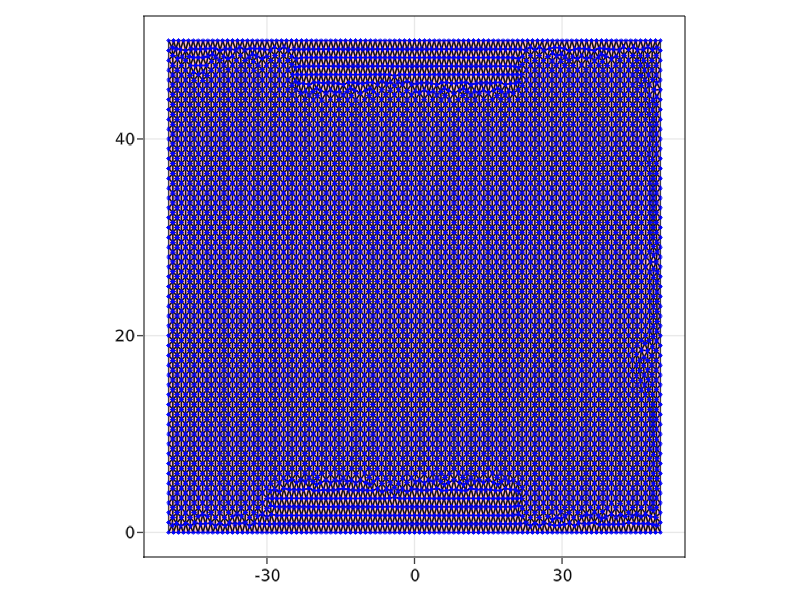

In [7]:
if Atom == false 
    fig, ax = plot(Ω0)
    ax.aspect = AxisAspect(1) # this makes the region with fixed aspect, so it might not give the correct ratios
    wireframe!(Ω0, color=:black, linewidth=1)
    scatter!(Ω0, marker=:star8, markersize=4, color=:blue)
    fig
end 

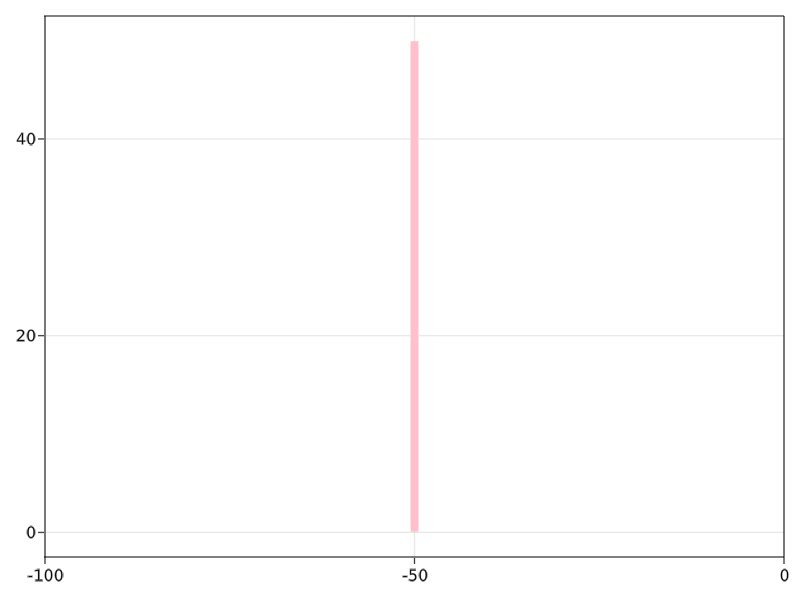

In [10]:
neumanntags_rhoI0= ["extrhoficc"]
Γ_rhoI0 = BoundaryTriangulation(model0,tags=neumanntags_rhoI0)
dΓ_rhoI0 = Measure(Γ_rhoI0,degree)


neumanntags_rhoI1= ["extrhoficc"]
Γ_rhoI1 = BoundaryTriangulation(model1,tags=neumanntags_rhoI1)
dΓ_rhoI1 = Measure(Γ_rhoI1,degree)

if Atom == false 
    fig = plot(Γ_rhoI0, linewidth=8
    #, shading=true
    )
end


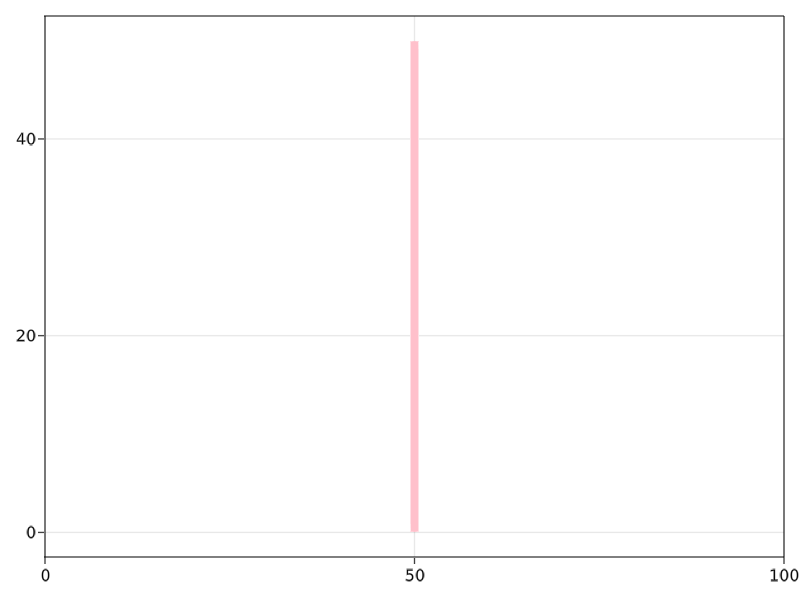

In [13]:
neumanntags_rho0= [ "extrho"]
Γ_rho0 = BoundaryTriangulation(model0,tags=neumanntags_rho0)
dΓ_rho0= Measure(Γ_rho0,degree)

neumanntags_rho1= [ "extrho"]
Γ_rho1 = BoundaryTriangulation(model1,tags=neumanntags_rho1)
dΓ_rho1= Measure(Γ_rho1,degree)

if Atom == false 
    fig = plot(Γ_rho0, linewidth=8
    #, shading=true
      )
end


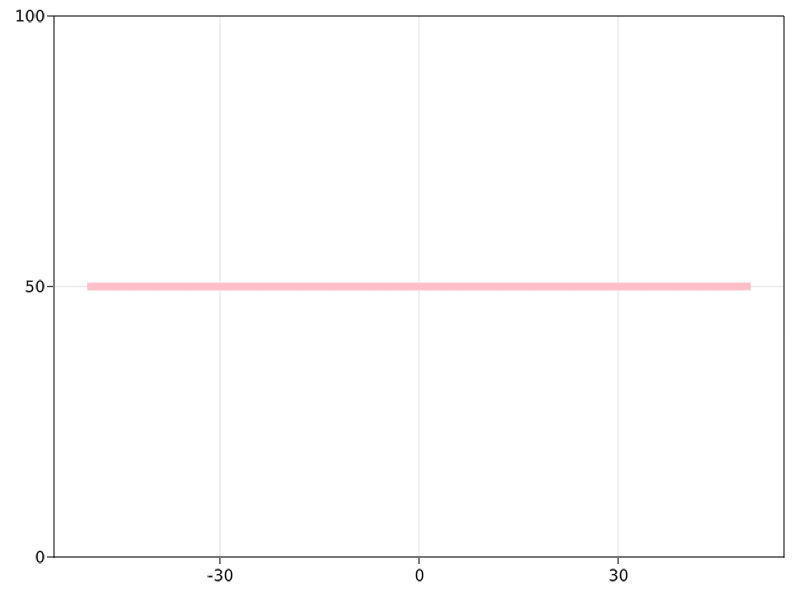

In [14]:
neumanntags_extz0 = [ "extz"]
Γ_extz0 = BoundaryTriangulation(model0,tags=neumanntags_extz0)
dΓ_extz0 = Measure(Γ_extz0,degree)


neumanntags_extz1 = [ "extz"]
Γ_extz1 = BoundaryTriangulation(model1,tags=neumanntags_extz1)
dΓ_extz1 = Measure(Γ_extz1,degree)

if Atom == false 
    fig = plot(Γ_extz0, linewidth=8
    #, shading=true
   )
end    


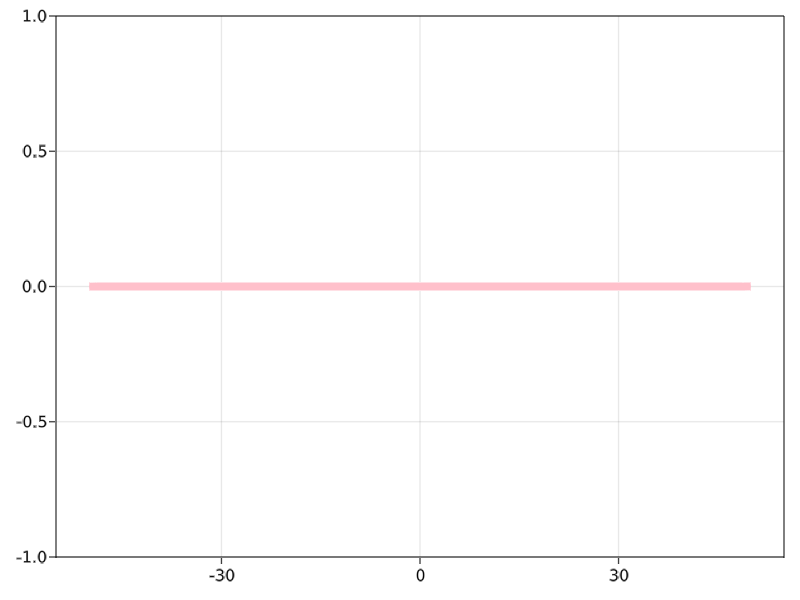

In [16]:
neumanntags_intz0 = [  "intz" ]
Γ_intz0 = BoundaryTriangulation(model0,tags=neumanntags_intz0)
dΓ_intz0 = Measure(Γ_intz0,degree)

neumanntags_intz1 = [  "intz" ]
Γ_intz1 = BoundaryTriangulation(model1,tags=neumanntags_intz1)
dΓ_intz1 = Measure(Γ_intz1,degree)

if Atom == false 
    fig = plot(Γ_intz0, linewidth=8
    #, shading=true
   )
end   



In [43]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(model0,reffe,conformity=:H1)
U = TrialFESpace(V)

order3 = 3
reffe3 = ReferenceFE(lagrangian,Float64,order3)
V_order3 = TestFESpace(model0,reffe3,conformity=:H1)
U_order3 = TrialFESpace(V_order3)

order4 = 4
reffe4 = ReferenceFE(lagrangian,Float64,order4)
V_order4 = TestFESpace(model0,reffe4,conformity=:H1)
U_order4 = TrialFESpace(V_order4)

UnconstrainedFESpace()

## Función $f$

In [21]:
vacio = false

false

In [22]:
a0=0.01
R=30
Z=30
s(x) = sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
q(x)=1. - s(x) ^4 * (1. - 5. *(s(x) -1.) + 15. * (s(x)-1.)^2 - 35. *(s(x) -1.)^3 +70. * (s(x)- 1.)^4)

if vacio == false
    function α(x)
        if abs(s(x))  < 1.
            return  q(x)*a0
        end
        if abs(s(x)) >= 1.
           return  0.
        end
    end
end

if vacio == true
    function α(x)
        return  0.
    end    
end

t(x) = 8*π*α(x)

#Cond de Newman borde centro
c(x)=0.

c (generic function with 1 method)

$$\rho \partial_{\rho} f +z \partial_z f+ f=0$$
$$\rho * w * \partial_z f$$

In [27]:
d(x) = VectorValue(2. ,0)

d (generic function with 1 method)

In [28]:
ρ(x)=abs(x[1])
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]
sig(x)= sign(x[1])

sig (generic function with 1 method)

In [30]:
a_0(u,v) = ∫(- ∇(v) ⋅ ∇(u)*ρ +(d  ⋅ ∇(u))*sig*v  ) *dΩ0 + ∫( -v *( u +(zvec ⋅ ∇(u))*z) ) *dΓ_rho0 +∫( -v *( u +(zvec ⋅ ∇(u))*z)  ) *dΓ_rhoI0 +   ∫(- v *(u  *ρ /z +(ρvec ⋅ ∇(u))*sig*ρ *ρ/z) ) *dΓ_extz0  
b_0(v) = ∫(-v * t* ρ) *dΩ0 - ∫(c * v* ρ ) *dΓ_intz0 

b_0 (generic function with 1 method)

In [46]:
op = AffineFEOperator(a_0,b_0,U,V)
op_order3 = AffineFEOperator(a_0,b_0,U_order3,V_order3)
op_order4 = AffineFEOperator(a_0,b_0,U_order4,V_order4) #NO FUNCIONA

AffineFEOperator()

In [34]:
ls = LUSolver()
solver = LinearFESolver(ls)

LinearFESolver()

In [35]:
uh= solve(solver,op)

SingleFieldFEFunction():
 num_cells: 11670
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12048096590185966464

In [52]:
u_0 = Interpolable(uh)
u0= interpolate_everywhere(u_0,U_order4)

SingleFieldFEFunction():
 num_cells: 11670
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12048096590185966464

In [44]:
uh_order3,= solve!(u0,solver,op_order3)

(SingleFieldFEFunction(), LUNumericalSetup())

In [45]:
u_03 = Interpolable(uh_order3)
u03= interpolate_everywhere(u_03,U_order4)

SingleFieldFEFunction():
 num_cells: 11670
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 12048096590185966464

In [56]:
uh_order4,= solve!(u0,solver,op_order4)

(SingleFieldFEFunction(), LUNumericalSetup())

In [57]:
writevtk(Ω0,"resultados/f_order2",cellfields=["f"=>uh])
writevtk(Ω0,"resultados/f_order_3",cellfields=["f"=>uh_order3])

#writevtk(Ω,"resultados/∇f",cellfields=["∇f"=>∇(uh)])

(["resultados/f_ord4.vtu"],)

In [117]:
f1=ρvec ⋅ ∇(uh)
f2=zvec ⋅ ∇(uh)
F=f2*f2 +f1*f1
#evaluate(f1)

OperationCellField():
 num_cells: 745712
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 6252606498014455882

In [118]:
invrho3(x)=3. /x[1]

invrho3 (generic function with 1 method)

In [119]:
writevtk(Ω,"resultados/Laplaciano_f",cellfields=["Lap"=> Δ(uh)])

(["resultados/Laplaciano_f.vtu"],)

In [120]:
writevtk(Ω,"resultados/f1",cellfields=["f1"=>f1])
writevtk(Ω,"resultados/f1_por_3sobre_rho",cellfields=["3divrho*f1"=>invrho3 * f1])

(["resultados/f1_por_3sobre_rho.vtu"],)

In [121]:
writevtk(Ω,"resultados/residual_f",cellfields=["resi"=> Δ(uh)+invrho3*f1+t])

(["resultados/residual_f.vtu"],)

In [122]:
writevtk(Ω,"resultados/F",cellfields=["F"=> F])

(["resultados/F.vtu"],)

residual es
$$\partial_{\rho} ^2 f +\partial_z ^2 f+ \frac{3}{\rho} \partial_{\rho} f + 8 \pi a =0 = \Delta(f) + \frac{3}{\rho} \partial_{\rho} f + 8 \pi a $$

### Factor conforme

In [123]:
function t1(x)
  return 2. * π*α(x)
end

function t2(x)
  return 6. * π*α(x)
end

t2 (generic function with 1 method)

In [124]:
res(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w)) + (0.25 * F *ρ *  ρ* ρ) * w2*(1/(w*w*w*w*w*w*w))  ) *dΩ #=+∫( -(( ρvec ⋅ ∇(w) )*sig +zvec ⋅∇(w)) * w2 *ρ ) *dΓ_intz  =#+ ∫(c * w2* ρ ) *dΓ_intz  +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rho + ∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z) ) *dΓ_rhoI+   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*sig*ρ*ρ/z) ) *dΓ_extz

res (generic function with 1 method)

In [125]:
jac(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2   -(1.75 * F *ρ  * ρ* ρ) * dw *w2*(1/(w*w*w*w*w*w*w*w)) ) *dΩ #=+∫( -(( ρvec ⋅ ∇(dw) )*sig +zvec ⋅∇(dw)) * w2 *ρ ) *dΓ_intz + ∫(c * w2* ρ ) *dΓ_intz =#+∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rhoI +∫(- w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rho+   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*sig*ρ*ρ/z) ) *dΓ_extz 

jac (generic function with 1 method)

In [126]:
M=1.
ϵ=1.E-8
ueD(x)=1. + M/( (x[1] ^2 + x[2]^2 + ϵ)^(1/2))

ueD (generic function with 1 method)

In [127]:
oppsi = FEOperator(res,jac,U,V)

FEOperatorFromWeakForm()

In [128]:
using LineSearches: BackTracking
nls = NLSolver(show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20, iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [129]:
r0=20
seed(x)=1.#(-1+1e1 )*(1+M/r0)* exp(-(x[1]^2 + x[2]^2)/r0^2) +(1. +M /( (x[1]^2 + x[2]^2)^(1/2)+1e-16) ) *(1-exp(-(x[1]^2 + x[2]^2)/r0^2 ))
w02=interpolate_everywhere(seed,U)

SingleFieldFEFunction():
 num_cells: 745712
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 6252606498014455882

In [130]:
writevtk(Ω,"resultados/seed",cellfields=["seed"=>seed])

(["resultados/seed.vtu"],)

In [131]:
w, = solve!(w02,solver,oppsi)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     8.483221e+00              NaN
     1     3.326557e+00     4.606968e+04
     2     1.303226e+00     5.437537e+04
     3     5.096967e-01     6.385548e+04
     4     1.983737e-01     7.073081e+04
     5     7.578141e-02     6.291276e+04
     6     2.666581e-02     3.349577e+04
     7     7.081491e-03     1.447414e+04
     8     1.320367e-03     5.636658e+03
     9     2.505023e-04     1.039168e+03
    10     5.110527e-06     2.361141e+01
    11     1.776935e-09     8.590314e-03
    12     1.628697e-13     1.026598e-09
    13     1.568190e-13     1.363301e-23
    14     1.501438e-13     2.088518e-25
    15     1.533079e-13     8.573311e-26
    16     1.310063e-13     3.027757e-26
    17     1.293271e-13     1.602556e-26
    18     1.293271e-13     0.000000e+00


(SingleFieldFEFunction(), NLSolversCache())

In [135]:
writevtk(Ω,"resultados/Fact",cellfields=["ψ"=>w])

(["resultados/Fact.vtu"],)

In [136]:
ρvec(x) = VectorValue(1.,0.)
partialψ= ρvec ⋅ ∇(w)
invrho(x)=1. /x[1]

invrho (generic function with 1 method)

In [137]:
writevtk(Ω,"resultados/residual_ψ",cellfields=["resi"=> Δ(w)+invrho*partialψ + t1 *(ρ/ (w*w*w)) + (0.25 * F *ρ *  ρ)*(1/(w*w*w*w*w*w*w))]) # Δ(.) es el operador en cartesianas


(["resultados/residual_ψ.vtu"],)

## Estudio del problema para el factor conforme sin el término de vinculo entre las dos ecuaciónes 

In [208]:
ρ(x)=abs(x[1])
ρvec(x) = VectorValue(1.,0)
zvec(x) = VectorValue(0,1.)
z(x)=x[2]
sig(x)= sign(x[1])
c(x)=0.

c (generic function with 1 method)

In [209]:
L=50.
R=5.
Z=5.
s(x) = sqrt((x[1]/ R)^2 + (x[2]/Z)^2) 
ψ_p(x)=(s(x)^3 +s(x)^2)/(1+s(x)^3)

ψ_p (generic function with 1 method)

In [210]:
writevtk(Ω,"resultados/ψ_p",cellfields=["ψ_p"=> ψ_p]) 

(["resultados/ψ_p.vtu"],)

In [49]:
exp1(x)=(-s(x)^4 +3. *s(x)^2 +2. *s(x))/(1+s(x)^3)^2
exp2(x)=((-4. *s(x)^3 +6. *s(x)+2.)*(1. +s(x)^6 +2. *s(x)^3)-6. *s(x)^2 *(1+s(x)^3)*(-s(x)^4 +3. *s(x)^2 +2. *s(x)) )/(1+s(x)^3)^4

exp2 (generic function with 1 method)

In [50]:
d2rho_rhodψ_p(x)=(2. *x[1]/(R*s(x))  -x[1]^3 /(R^2 *s(x)^3))*exp1(x) +(x[1]^3/((R*s(x))^2))*exp2(x)
d2z_dψ_p(x)=  ( 1. /(Z*s(x))  -x[2]^2 /(Z^2 *s(x)^3))*exp1(x)+( x[1]/(R*s(x)) )^2 *exp2(x)

d2z_dψ_p (generic function with 1 method)

In [51]:
a_p(x)=-(1. /(2. *π*x[1])) *( (1. /x[1])*d2rho_rhodψ_p(x) +d2z_dψ_p(x))

a_p (generic function with 1 method)

In [52]:
writevtk(Ω,"resultados/a_p",cellfields=["a_p"=> a_p]) 

(["resultados/a_p.vtu"],)

In [53]:
s_ρL(x)=sqrt((L/ R)^2 + (x[2]/Z)^2) #z libre
s_zL(x)=sqrt((x[1]/ R)^2 + (L/Z)^2) #rho libre

exp1_ρL(x)=(-s_ρL(x)^4 +3. *s_ρL(x)^2 +2. *s_ρL(x))/(1+s_ρL(x)^3)^2
exp1_zL(x)=(-s_zL(x)^4 +3. *s_zL(x)^2 +2. *s_zL(x))/(1+s_zL(x)^3)^2

ψ_p_ρL(x)=(s_ρL(x)^3 +s_ρL(x)^2)/(1+s_ρL(x)^3)
ψ_p_zL(x)=(s_zL(x)^3 +s_zL(x)^2)/(1+s_zL(x)^3)

ψ_p_zL (generic function with 1 method)

In [54]:
xL=[L,L]

2-element Vector{Float64}:
 50.0
 50.0

In [55]:
Robin_ρL(x)=L*( exp1_ρL(x) *(L/(R*s_ρL(x))) )*sig(x)+z(x)* (exp1_ρL(x) *(z(x) /(Z*s_ρL(x) )) )+ (ψ_p_ρL(x)-1.) #rho cte, z libre
Robin_zL(x)=ρ(x)*( exp1_zL(x) *(ρ(x)/(R*s_zL(x))) )*sig(x)+ L* (exp1_zL(x) *(L /(Z*s_zL(x) )) )+ (ψ_p_zL(x)-1.)#rho libre, z cte

Robin_zL (generic function with 1 method)

In [56]:
writevtk(Ω,"resultados/RzL",cellfields=["Robin_zL"=> Robin_zL]) 
writevtk(Ω,"resultados/RρL",cellfields=["Robin_ρL"=> Robin_ρL]) 

(["resultados/RρL.vtu"],)

In [57]:
function t1(x)
  return 2. * π*a_p(x)
end

function t2(x)
  return 6. * π*a_p(x)
end

t2 (generic function with 1 method)

In [58]:
resp(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1 *( (w2*ρ * ρ)/(w*w*w))  ) *dΩ + ∫(c * w2* ρ ) *dΓ_intz  +∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z)+w2* Robin_ρL ) *dΓ_rho + ∫( -w2 *( (w- 1.) +(zvec ⋅ ∇(w))*z)  +w2* Robin_ρL ) *dΓ_rhoI+   ∫( -w2 *( (w -1. )*ρ/z +(ρvec ⋅ ∇(w))*sig*ρ*ρ/z) +w2*ρ* Robin_zL/z) *dΓ_extz

resp (generic function with 1 method)

In [59]:
jacp(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ *  ρ)/(w*w*w*w))*t2  ) *dΩ +∫( -w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rhoI +∫(- w2 *( (dw#=- 1.=#) +(zvec ⋅ ∇(dw))*z) ) *dΓ_rho+   ∫( -w2 *( (dw #=-1.=# )*ρ/z +(ρvec ⋅ ∇(dw))*sig*ρ*ρ/z) ) *dΓ_extz 

jacp (generic function with 1 method)

In [60]:
oppsp = FEOperator(resp,jacp,U,V)

FEOperatorFromWeakForm()

In [61]:
using LineSearches: BackTracking
nls = NLSolver(show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20, iterations=50)
solver = FESolver(nls)

NonlinearFESolver()

In [62]:
w0p=interpolate_everywhere(ψ_p,U)

SingleFieldFEFunction():
 num_cells: 110592
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 15082730895627112542

In [63]:
w_p, = solve!(w0p,solver,oppsp)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     4.309144e+07              NaN
     1     3.905438e+07     3.820583e+05


LoadError: InterruptException:

In [64]:
writevtk(Ω,"resultados/w_p",cellfields=["w_p"=> w_p]) 

LoadError: UndefVarError: w_p not defined